# Notebook 36: Parallel fault propagation folds

This notebook looks at the kink type, parallel fault propagation model [(Suppe and Medwedeff, 1990)](https://www.e-periodica.ch/digbib/view?pid=egh-001%3A1990%3A83%3A%3A418&referrer=search#418). The figure below (from [Allmendinger et al., 2012](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9)) shows the kinematic model for a simple step, parallel fault propagation fold. Note that the model consists of four velocity domains, $v_1$ and $v_2$ are the velocities along the $\mathbf{x_1}$ and $\mathbf{x_2}$ axes, $s$ is the slip, and $R$ is a slip ratio (more details in [Allmendinger et al., 2012](https://www.cambridge.org/core/books/structural-geology-algorithms/C5AB97C135925A5D49726B741738DCA9)):

<img src="../figures/parallel_fpf.png" alt="parallel_fpf" width="500" style="display: block; margin: 0 auto"/><br><br>

The function [parallel_fpf](../functions/parallel_fpf.py) plots the evolution of a simple step, parallel fault propagation fold. Let's start by simulating a fold with a 20° dipping ramp. As you can see, this results in an overturned forelimb.

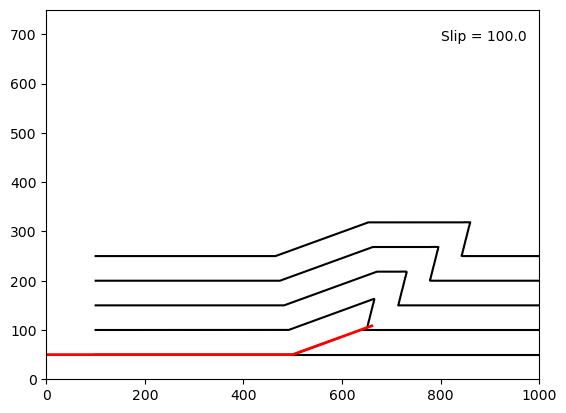

In [1]:
import numpy as np

# import our function
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))
from parallel_fpf import parallel_fpf

# define the input parameters
# beds datums
yp = [50, 100, 150, 200, 250] 
# extent of section and number of points
p_sect = [1000, 500] 
# x at fault bend, ramp angle, ramp height
# 20 deg dipping ramp -> overturned forelimb
p_ramp = [500, 20*np.pi/180] 
# total and incremental slip
p_slip = [100, 0.5]

# plot the fault propagation fold
parallel_fpf(yp, p_sect, p_ramp, p_slip)

Now let's look at a fold above a 40° ramp. This results in an upright forelimb.

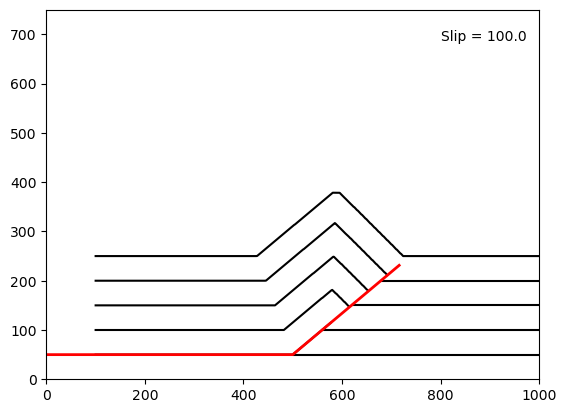

In [2]:
# 40 deg ramp -> upright forelimb
p_ramp = [500, 40*np.pi/180] 
parallel_fpf(yp, p_sect, p_ramp, p_slip)

Let's now run a model with a ramp angle of 29°. Let's add to this model growth strata.

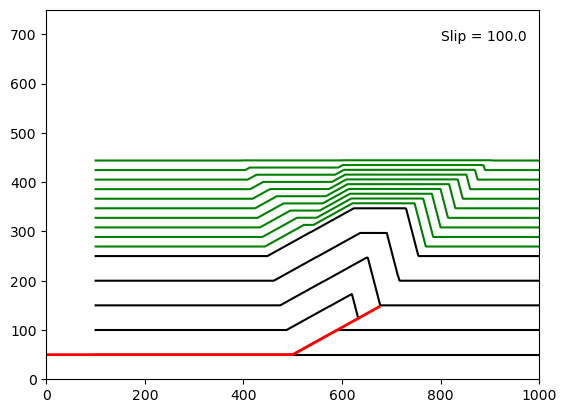

In [3]:
# 29 deg ramp -> looks similar to fixed axis fpf
p_ramp = [500, 29*np.pi/180]
# subsidence rate = uplift rate * 2, G = 2.0
G = 2.0

parallel_fpf(yp, p_sect, p_ramp, p_slip, G)

Finally, let's run a model with a fault ramp angle of 32°.

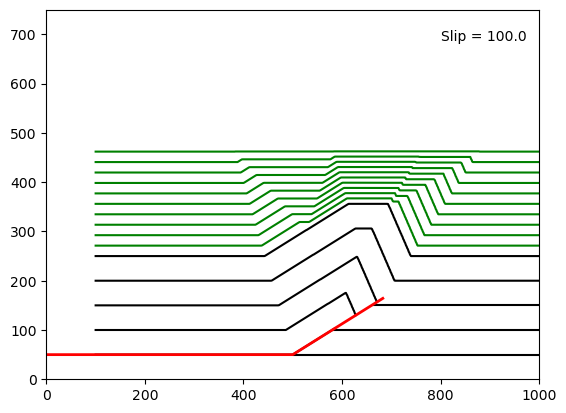

In [4]:
# 32 deg ramp 
p_ramp = [500, 32*np.pi/180]
# subsidence rate = uplift rate * 2, G = 2.0
G = 2.0

parallel_fpf(yp, p_sect, p_ramp, p_slip, G)

Note how the growth strata geometries are segmented by kink axes. These are well explained in [Suppe et al. (1992)](https://link.springer.com/chapter/10.1007/978-94-011-3066-0_9).

Compare the last two cases with those made using the fixed-axis model in the [previous notebook](nb35_fixed_axis_fpf.ipynb). You can see that the parallel and fixed axis models, give the same result for a ramp angle of 29°. For the 32° dipping ramp, the fixed axis and parallel models look similar, but in the parallel model there is an additional growth triangle in the strata above the crest of the anticline. This is the result of the parallel model having two velocity domains ahead of the fold backlimb, while the fixed axis model have just one.